## Predicting Customer Churn via ANN

The data used in this project is a learning training set for a bank with 10000 customers who were randomly selected from a much larger dataset.  These customers were followed for 6 months to study which customers churned/left the bank or remained with the bank after 6 months.  Our binary response variable in this dataset is labeled "Exited."  The number 1 indicates the customer left and 0 indicates the customer stayed with the bank. 

We want to find the probability that the customer leaves the bank.

Three columns in this data set will be excluded as it's determined to not have any relavence to our objective.  Those columns to be removed are:

RowNumber
Customerid
Surname

In [14]:
#Import the Dependent libraries for our Project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [29]:
#How to check the version of Tensorflow we're using
tf.__version__

'2.8.0'

## DATA PREPROCESSING & EDA

In [3]:
#import the dataset
df = pd.read_csv("Churn_Modelling.csv")

print('shape ',df.shape)
df.head(2)

shape  (10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [5]:
# What is the shape of the data?
df.shape

(10000, 14)

In [9]:
#Describe the data statistically
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [7]:
#We have two columns (Geography & Gender) with object data types that we'll have to encode later.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [13]:
#Data is fairly balanced between genders
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [42]:
#Lets begin by just looking at the basic correlation between the features and our response variable
# Immediately we see that age has the highest positive correlation to our exited feature
corr = df.corr()

corr.style.background_gradient(cmap='coolwarm')

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<AxesSubplot:xlabel='EstimatedSalary', ylabel='Age'>

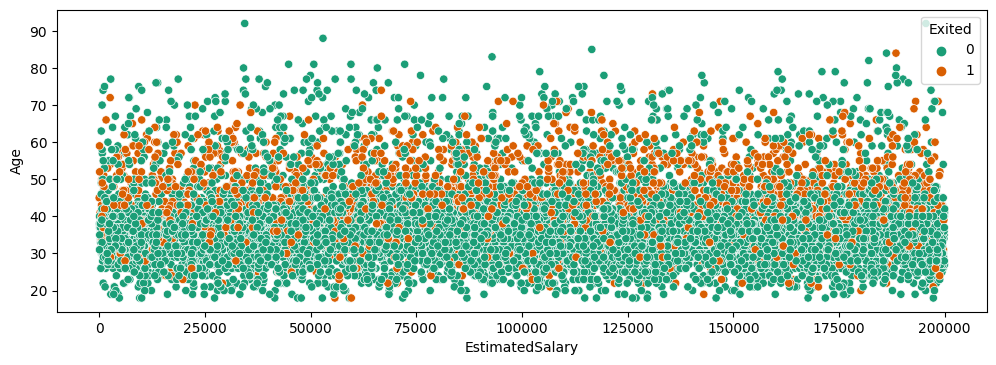

In [16]:
#Lets see if we can reveal a little more information on our age relationship with the exited response variable

plt.figure(figsize=(12,4),dpi=100)
sns.scatterplot(x='EstimatedSalary',
                y='Age', 
                data=df, 
                hue='Exited',
                palette='Dark2')


#You can hue by categorical or continuous
#by using Exited as a hue, it creates a gradient
#Lets explore this more becasue it looks like age plays a role in exiting a bank

<AxesSubplot:xlabel='Age', ylabel='Count'>

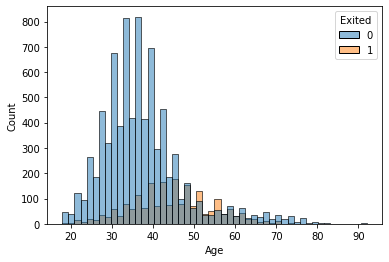

In [21]:
#HISTOGRAM

sns.histplot(data=df,x='Age',bins=50, hue='Exited')

# Here we see the age of exited customers as well.
# The distribution of ages within the customers is skewed to the right with a mean age less than the exited group.
# Blue=0=stayed
# orange=1=exited


In [90]:
# Mean age
df['Age'].mean()

38.9218

In [30]:
#Lets look more into the age and exited relationship
df_exited = df[df['Exited']==1]

In [43]:
# We see that the mean age is 44.83 years old.
# This is reflected in the histogram plot.
df_exited['Age'].mean()

44.8379970544919

<AxesSubplot:xlabel='Age', ylabel='Count'>

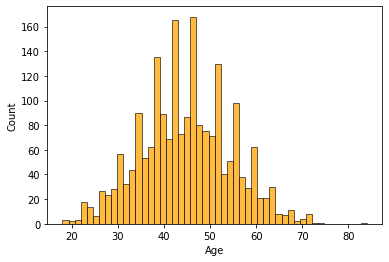

In [31]:
#We can see that age does play a factor in exiting.
sns.histplot(data=df_exited,x='Age',bins=50, color='orange')

<AxesSubplot:xlabel='Age', ylabel='Count'>

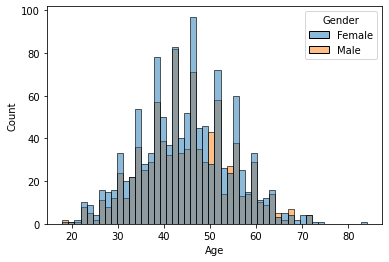

In [66]:
#HISTOGRAM
# Does gender play a role?  

sns.histplot(data=df_exited,x='Age',bins=50, hue='Gender')

# Here we see that gender within the exiting class is relatively equal.
#Blue=0=stayed
#orange=1=exited

<AxesSubplot:xlabel='CreditScore', ylabel='Count'>

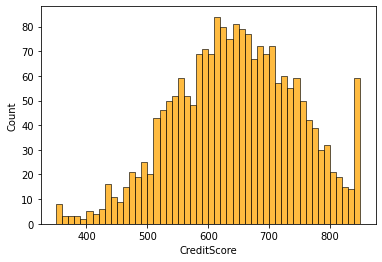

In [36]:
#The distribution of exited customers relatived to their credit scores.
sns.histplot(data=df_exited,x='CreditScore',bins=50, color='orange')

<AxesSubplot:xlabel='Age', ylabel='CreditScore'>

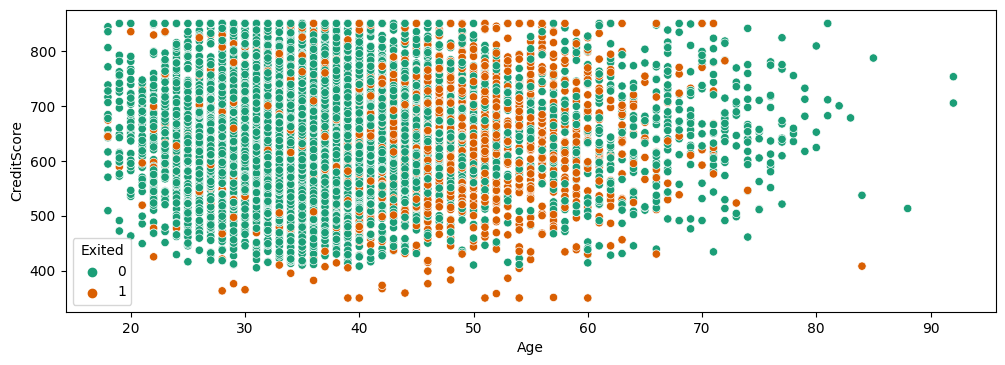

In [44]:
plt.figure(figsize=(12,4),dpi=100)
sns.scatterplot(x='Age',
                y='CreditScore', 
                data=df, 
                hue='Exited',
                palette='Dark2')



<AxesSubplot:xlabel='Age', ylabel='NumOfProducts'>

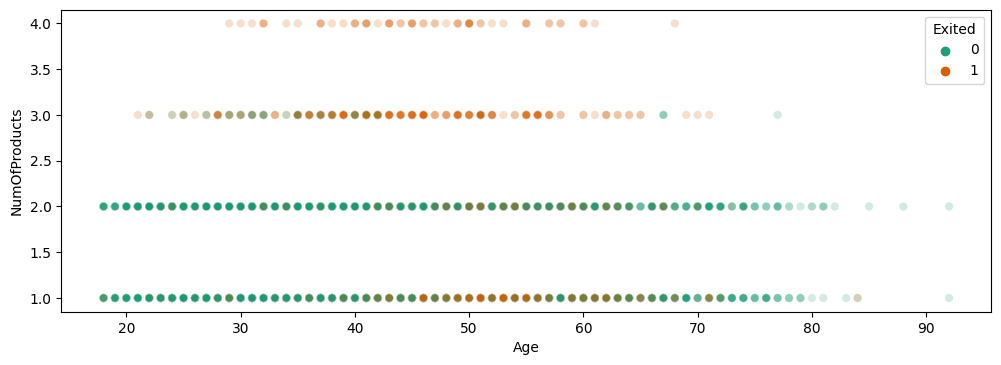

In [75]:
# This is interesting.  Age and NumOfProducts show some relationship with exiting
plt.figure(figsize=(12,4),dpi=100)
sns.scatterplot(x='Age',
                y='NumOfProducts', 
                data=df, 
                hue='Exited',
                alpha=0.2,
                palette='Dark2')
# It appears that the higher the number of products you have the more likely you were to leave, regardless of age.

<AxesSubplot:xlabel='NumOfProducts', ylabel='Count'>

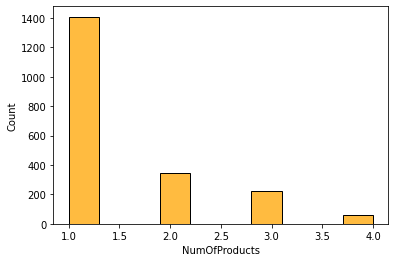

In [53]:
#The distribution of exited customers relatived to the number of products they had with the bank.
sns.histplot(data=df_exited,x='NumOfProducts',bins=10, color='orange')

In [86]:
df.head(10)
#df[df['NumOfProducts']==4].head(15)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [78]:
df_exited[df_exited['NumOfProducts']==4].shape

(60, 14)

In [87]:
df['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [88]:
df_exited['NumOfProducts'].value_counts()

1    1409
2     348
3     220
4      60
Name: NumOfProducts, dtype: int64

In [64]:
#More customers were living in the 50-59 age range than staying!
df[(df['Age']>49) & (df['Age']<60)]['Exited'].value_counts()

1    487
0    382
Name: Exited, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

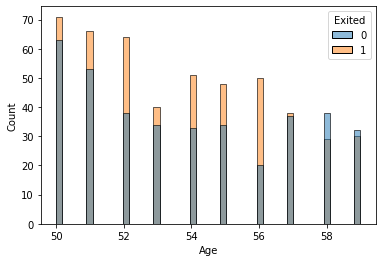

In [67]:
#Lets look at this age group more
df_fifties = df[(df['Age']>49) & (df['Age']<60)]

#HISTOGRAM
 

sns.histplot(data=df_fifties ,x='Age',bins=50, hue='Exited')

# Here we see that customers in their fifties were more likely to leave the bank than stay.
#Blue=0=stayed
#orange=1=exited

## KEY FINDINGS FROM EXPLORATORY DATA ANALYSIS

1. Age is has the strongest correlation in determining if a customer churns or stays.  The customers that exited the company, their age was normally distributed around the mean age of 44.  

2. Number of products a customer has also shown to be an indicator if a person churns or not.  If a customer had 3 products in this study, 82% of them churned.  If a customer had 4 products, 100% of them churned.  

3. Although the higher number of products a customer had the higher the likely hood of them leaving, this still doesnt address the bulk of the people leaving that were just slightly older than the mean of the total population that had only 1 product from the bank.  We'll see if a model can help with predicting who will leave and with what probability.

Suggestions:

With the age of the bank's customers skewed to the right with a mean age of 39, I would look at adding financial products that focus on working professionals that are eyeing retirement. It's obvious that the more investment savy their customer is the more likely they are to leave the bank.

I would also investigate current processes and procedures that may make hindering service to the aging population.  Older customers may not be as tech savy as their younger counter parts, thus skewing the age to the right with olders customers hitting the door.

## CONTINUE WITH DATA PREPROCESSING

In [4]:
#Taking care of missing data
#Checking for missing values.  We have none.
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [91]:
#We have two columns (Geography & Gender) with object data types that we'll have to encode later.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [34]:
#When assigning data to our variables x and y, we need to either drop the unwanted columns now or while 
#assigning the columns to the variables
#Columns start at index 0, so we state that we need from column 3 and on when assigning data to x
# syntax iloc[:,3:-1] is read as [': = all columns', 3:-1 = starting at index 3 up until and not including the last column]
# We could have just as easy dropped these from the original dataset using df.drop()
# Remember to using .values when working with ANN's

X = df.iloc[:,3:-1].values
y = df.iloc[:,-1].values

In [35]:
# Check the matrix that we just created for X and y
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [36]:
#Response or Dependent Variable.  1 = Exited, 0 = Stayed
print(y)

[1 0 1 ... 1 1 0]


## ENCODING CATEGORICAL DATA
Two columns in our dataset (Georgraphy & Gender) of object type data.  We'll need to encode these in order to incorporate them into our ANN model

In [37]:
#Lets label encode the "Gender" column first

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#we take all rows in column index 2 and encode them
X[:,2] = le.fit_transform(X[:,2])


In [38]:
#Check our encode
#Female = 0 and Male = 1

#Notice that this way of encoding is different than dummy variables
#we didnt have to concat df's or drop any columns

print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [39]:
#One Hot Encoding due to the number of categories and order of "Georgraphy" column

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#The index vairable of 1 is from the X matrix above.  This is the only thing needing adjusted in this code
#It will move create dummy variable in our matrix
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[1])],remainder='passthrough')
X = np.array(ct.fit_transform(X))



In [40]:
#I would question if one dummy var needs to be drop for multicolinearity concerns
#and does this code drop the original "Geography" Column?
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [41]:
#We notice that the dummies have been placed in front and all object columns have now been replaced with dummy variables.

# France = 1.0 0.0. 0.0
# Spain = 0.0 0.0 1.0
# Germany = 0.0 1.0 0.0

print(X[0,:])

[1.0 0.0 0.0 619 0 42 2 0.0 1 1 1 101348.88]


## SPLITTING THE DATASET INTO TRAINING & TEST SETS

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [43]:
## FEATURE SCALING

#When building a ANN, feature scaling is absolutely critical.  It makes the model more computationaly more 
#efficient.  Models will work without the scaling, but it's not advised.
#Scale all features


from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

DATA PREPROCESSING PHASE IS COMPLETE. 

## BUILDING THE ANN MODEL

In [44]:
#Intializing the ANN Model
ann = tf.keras.models.Sequential()

#Notice that keras is now a part of tensorflow

In [45]:
#"add" is a method of Sequential()

#Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

#Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# NOTES:  The hyperparameter for ANN is the number of units/neurons
# in the hidden layers
# Also, our class had us put the number of features 
# in the first layer but here we don't.  Ask professor about this
# I've also notice differing syntax with some of other ANN models.
# syntax may have changed.

# NOTES: Typically all hidden layers will share the same activation 
# function.  The output layer will typically have a different 
# activation function

# NOTES: The number of neurons in a hidden layer typically doesnt exceed 
# The number of features plus the number of response variables.
# Could lead to overfitting issues.

# NOTES:  You could explore the number of hidden layers to 
# see how that impacts accuracy

In [46]:
#Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# NOTES: the sigmoid activation function on the output layer 
# allows us to get probability that the binary outcome is 1

# If the output was non-binary classification, the activation function
# in the output layer would have to be "soft_max"

# NOTES:  Notice we only use 1 neuron or unit for binary output, 1 or 0
# you put the dimensions in the output layer.  If we were doing multiclass,
# i.e. output A,B,C, the diminsion would be 3, or units= 3, 
# This would need to be one hot encoded.  Study this more


### THIS COMPLETES THE ANN MODEL  ###

# Next is training and testing

## TRAINING THE ANN

In [47]:
# Compile the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# NOTES:  If we were doing multiclass, your loss function would have to be
# "category_crossentropy"

In [48]:
#Training the ANN on the Training set
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

#  batch_size is how many results you want the ann to compare for loss
# function at a time. Instead of one for one, it will do i.e 32 at a time

Epoch 1/100
250/250 [==============================] - 9s 2ms/step - loss: 0.6312 - accuracy: 0.7003
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4918 - accuracy: 0.7993
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4522 - accuracy: 0.8089
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4355 - accuracy: 0.8130
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4275 - accuracy: 0.8186
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4213 - accuracy: 0.8202
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4160 - accuracy: 0.8248
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4112 - accuracy: 0.8285
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4067 - accuracy: 0.8284
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4023 - accura

## PREDICTING THE TEST SET ON OUR ANN

In [49]:
# This single predict line would return probabilities of each customer 
# leaving or staying.  Not will they or wont they stay.
y_pred = ann.predict(X_test)

# This returns a boolean True/False.  
# True = Customer churned, False = Customer stayed
y_pred = y_pred > 0.5

print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [50]:
# CREATE CONFUSION MATRIX TO BETTER UNDERSTAND THE PEFORMANCE OF OUR MODEL

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

# OVERALL WE GET AN ACCURACY OF 86.35%  Not bad!

# 1520 correct predictions that the customer stays with the bank
# 191 correct predictionss that the customer leaves the bank
# 59 incorrect predictions that the customer leaves the bank
# 214 incorrect predictions that the customer stays with the bank


[[1536   59]
 [ 214  191]]


0.8635

## TESTING OUR ANN MODEL ON A SINGLE CUSTOMER.

Our goal is to not only determine if the customer will stay or leave, but also, what is the probability that the will customer leave.

Our fictional customer and his/her assigned features

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: $ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: $ 50000


In [51]:
# NOTES:  Data has to be entered in the same format and scale
# as the original training data.  This includes the encoded categories as well
# Notice the double brackets for 2d inputs and the scale.transorm from 
# the original scale.fit_transform that was used on the original training
# data.

print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])))
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)


[[0.02371028]]
[[False]]


Our fictional customer has a probability of leaving at 2.37% and our ANN model has predicted "False" which means our customer is predicted to stay with the bank.